In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/regi/Flatiron/mod4_project/cleaned_data/dem_risk.csv')

In [3]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Native_American,Asian,Hispanic,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,5055.648,13076.628,30285.276,4763.976,...,243.060,291.672,826.404,13514.136000,38209.032000,11909.940000,14146.092000,12930.79200,6902.904,5690.0
1,1,3,Baldwin,Alabama,AL,162586,16583.772,38207.710,98039.358,23574.970,...,812.930,650.344,3739.478,44223.392000,123890.532000,38370.296000,49588.730000,39996.15600,11706.192,19798.0
2,1,5,Barbour,Alabama,AL,28414,6279.494,6904.602,17758.750,3296.024,...,113.656,85.242,880.834,7532.092860,22425.227184,7273.984000,7524.296032,5029.27800,1875.324,5126.0
3,1,7,Bibb,Alabama,AL,21516,3614.688,5292.936,13619.628,2345.244,...,64.548,21.516,301.224,5703.544379,18632.856000,5195.078833,5697.640368,4972.96736,2818.596,3315.0
4,1,9,Blount,Alabama,AL,55725,6631.275,13652.625,34605.225,6742.725,...,278.625,111.450,3510.675,18667.875000,41570.850000,13485.450000,14756.507227,13151.10000,4680.900,8131.0


In [4]:
df.columns


Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Population_Size', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured'],
      dtype='object')

In [5]:

# dv_column  - str, name of the column

def make_column_scatters(df, dv_column, fig_columns=2, select_columns=None, figure_size=[14,14]):
    #if a list of columns is passed use that, otherwise use all df columns
    if select_columns is not None:
        column_list = select_columns
    else:
        column_list = list(df.columns)
        column_list.remove(dv_column)
    # Set matplotlib style
    plt.style.use('ggplot')
    # get number of rows and columns for the figure grid of plots
    df_cols_len = len(column_list)
    fig_rows = df_cols_len // fig_columns
    if df_cols_len % fig_columns != 0:
        fig_rows += 1
    # create fig and subplots
    fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_columns, figsize=figure_size, dpi=100,sharex=False, sharey=False)
    # create a list of subpolot axes
    list_of_axes = []
    if (fig_rows == 1) | (fig_columns == 1):
        for n in range(max([fig_rows, fig_columns])):
            list_of_axes.append(ax[n])
    else:
        for n in range(fig_rows):
            for i in range(fig_columns):
                list_of_axes.append(ax[n,i])
    # plot a histogram on each axes
    for n in range(df_cols_len):
        list_of_axes[n].scatter(df[column_list[n]], df[dv_column])
        list_of_axes[n].set_title(f'{column_list[n]}, dtype:{np.dtype(df[column_list[n]]).name}')

In [6]:
col_list = ['Population_Size', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker',
       'Uninsured']

In [7]:
# make_column_scatters(df, 'Diabetes', select_columns=col_list, figure_size = [25,35])

In [8]:
# # import sklearn
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

In [9]:
# st_df = pd.DataFrame(ss.fit_transform(df[['Population_Size', 'Poverty',
#        'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
#        'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
#        'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker',
#        'Uninsured']]), columns = col_list)

In [10]:

def make_column_hists(df, fig_columns, select_columns=None, bin_number=10, figure_size=[14,14]):
    #if a list of columns is passed use that, otherwise use all df columns
    if select_columns is not None:
        column_list = select_columns
    else:
        column_list = df.columns
    # Set matplotlib style
    plt.style.use('ggplot')
    # get number of rows and columns for the figure grid of plots
    df_cols_len = len(column_list)
    fig_rows = df_cols_len // fig_columns
    if df_cols_len % fig_columns != 0:
        fig_rows += 1
    # create fig and subplots
    fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_columns, figsize=figure_size, dpi=100,sharex=False, sharey=False)
    # create a list of subpolot axes
    list_of_axes = []
    if (fig_rows == 1) | (fig_columns == 1):
        for n in range(max([fig_rows, fig_columns])):
            list_of_axes.append(ax[n])
    else:
        for n in range(fig_rows):
            for i in range(fig_columns):
                list_of_axes.append(ax[n,i])
    # plot a histogram on each axes
    for n in range(df_cols_len):
        list_of_axes[n].hist(df[column_list[n]], bins=bin_number)
        list_of_axes[n].set_title(f'{column_list[n]}, dtype:{np.dtype(df[column_list[n]]).name}')

In [11]:
def drop_n_plot(df, list_of_cols):
    for col in list_of_cols:
        value = df[col].quantile(q=.8)
        dropped = df[col].loc[(df[col] < value)]
        dropped.hist(bins=20)
        plt.title(col)
        plt.show()
        print(f'{col} values dropped: {df[col].loc[(df[col] == value)].count()}')
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

In [16]:
num_cols = ['Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured']

In [15]:
df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Population_Size', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured'],
      dtype='object')

In [17]:
def num_to_perc(df, list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].div(df['Population_Size'],axis='index')

In [18]:
num_to_perc(df, num_cols)

In [19]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Native_American,Asian,Hispanic,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,0.104,0.269,0.623,0.098,...,0.005,0.006,0.017,0.278000,0.786000,0.245000,0.291000,0.266000,0.142,0.117049
1,1,3,Baldwin,Alabama,AL,162586,0.102,0.235,0.603,0.145,...,0.005,0.004,0.023,0.272000,0.762000,0.236000,0.305000,0.246000,0.072,0.121769
2,1,5,Barbour,Alabama,AL,28414,0.221,0.243,0.625,0.116,...,0.004,0.003,0.031,0.265084,0.789232,0.256000,0.264809,0.177000,0.066,0.180404
3,1,7,Bibb,Alabama,AL,21516,0.168,0.246,0.633,0.109,...,0.003,0.001,0.014,0.265084,0.866000,0.241452,0.264809,0.231129,0.131,0.154071
4,1,9,Blount,Alabama,AL,55725,0.119,0.245,0.621,0.121,...,0.005,0.002,0.063,0.335000,0.746000,0.242000,0.264809,0.236000,0.084,0.145913


In [20]:
df.shape

(3141, 23)

In [22]:
(df.corr() > .75).sum()

State_FIPS_Code     1
County_FIPS_Code    1
Population_Size     1
Poverty             1
Age_19_Under        1
Age_19_64           1
Age_65_84           2
Age_85_and_Over     2
White               1
Black               1
Native_American     1
Asian               1
Hispanic            1
No_Exercise         1
Few_Fruit_Veg       1
Obesity             1
High_Blood_Pres     1
Smoker              1
Diabetes            1
Uninsured           1
dtype: int64

In [23]:
df['Population_Size'].sum()

296410404

In [24]:
df['Pop_proportion'] = df['Population_Size']/df['Population_Size'].sum() 

In [ ]:
df['Pop_proportion'] = df['Population_Size']/df['Population_Size'].sum() 
col_list = ['Population_Size', 'Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Uninsured']
for col in col_list:
    df[col] = df[col] * df['Pop_proportion']

In [25]:
print(col_list)

['Population_Size', 'Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Uninsured']


In [26]:

for col in col_list:
    df[col] = df[col] * df['Pop_proportion']

In [ ]:
df['Pop_proportion'] = df['Population_Size']/df['Population_Size'].sum() 
for col in col_list:
    df[col] = df[col] * df['Pop_proportion']

In [27]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Pop_proportion
0,1,1,Autauga,Alabama,AL,7.972482,0.000017,0.000044,0.000102,0.000016,...,9.840140e-07,0.000003,0.000046,0.000129,0.000040,0.000048,0.000044,0.142,0.000019,0.000164
1,1,3,Baldwin,Alabama,AL,89.181105,0.000056,0.000129,0.000331,0.000080,...,2.194066e-06,0.000013,0.000149,0.000418,0.000129,0.000167,0.000135,0.072,0.000067,0.000549
2,1,5,Barbour,Alabama,AL,2.723775,0.000021,0.000023,0.000060,0.000011,...,2.875810e-07,0.000003,0.000025,0.000076,0.000025,0.000025,0.000017,0.066,0.000017,0.000096
3,1,7,Bibb,Alabama,AL,1.561815,0.000012,0.000018,0.000046,0.000008,...,7.258855e-08,0.000001,0.000019,0.000063,0.000018,0.000019,0.000017,0.131,0.000011,0.000073
4,1,9,Blount,Alabama,AL,10.476271,0.000022,0.000046,0.000117,0.000023,...,3.759989e-07,0.000012,0.000063,0.000140,0.000045,0.000050,0.000044,0.084,0.000027,0.000188


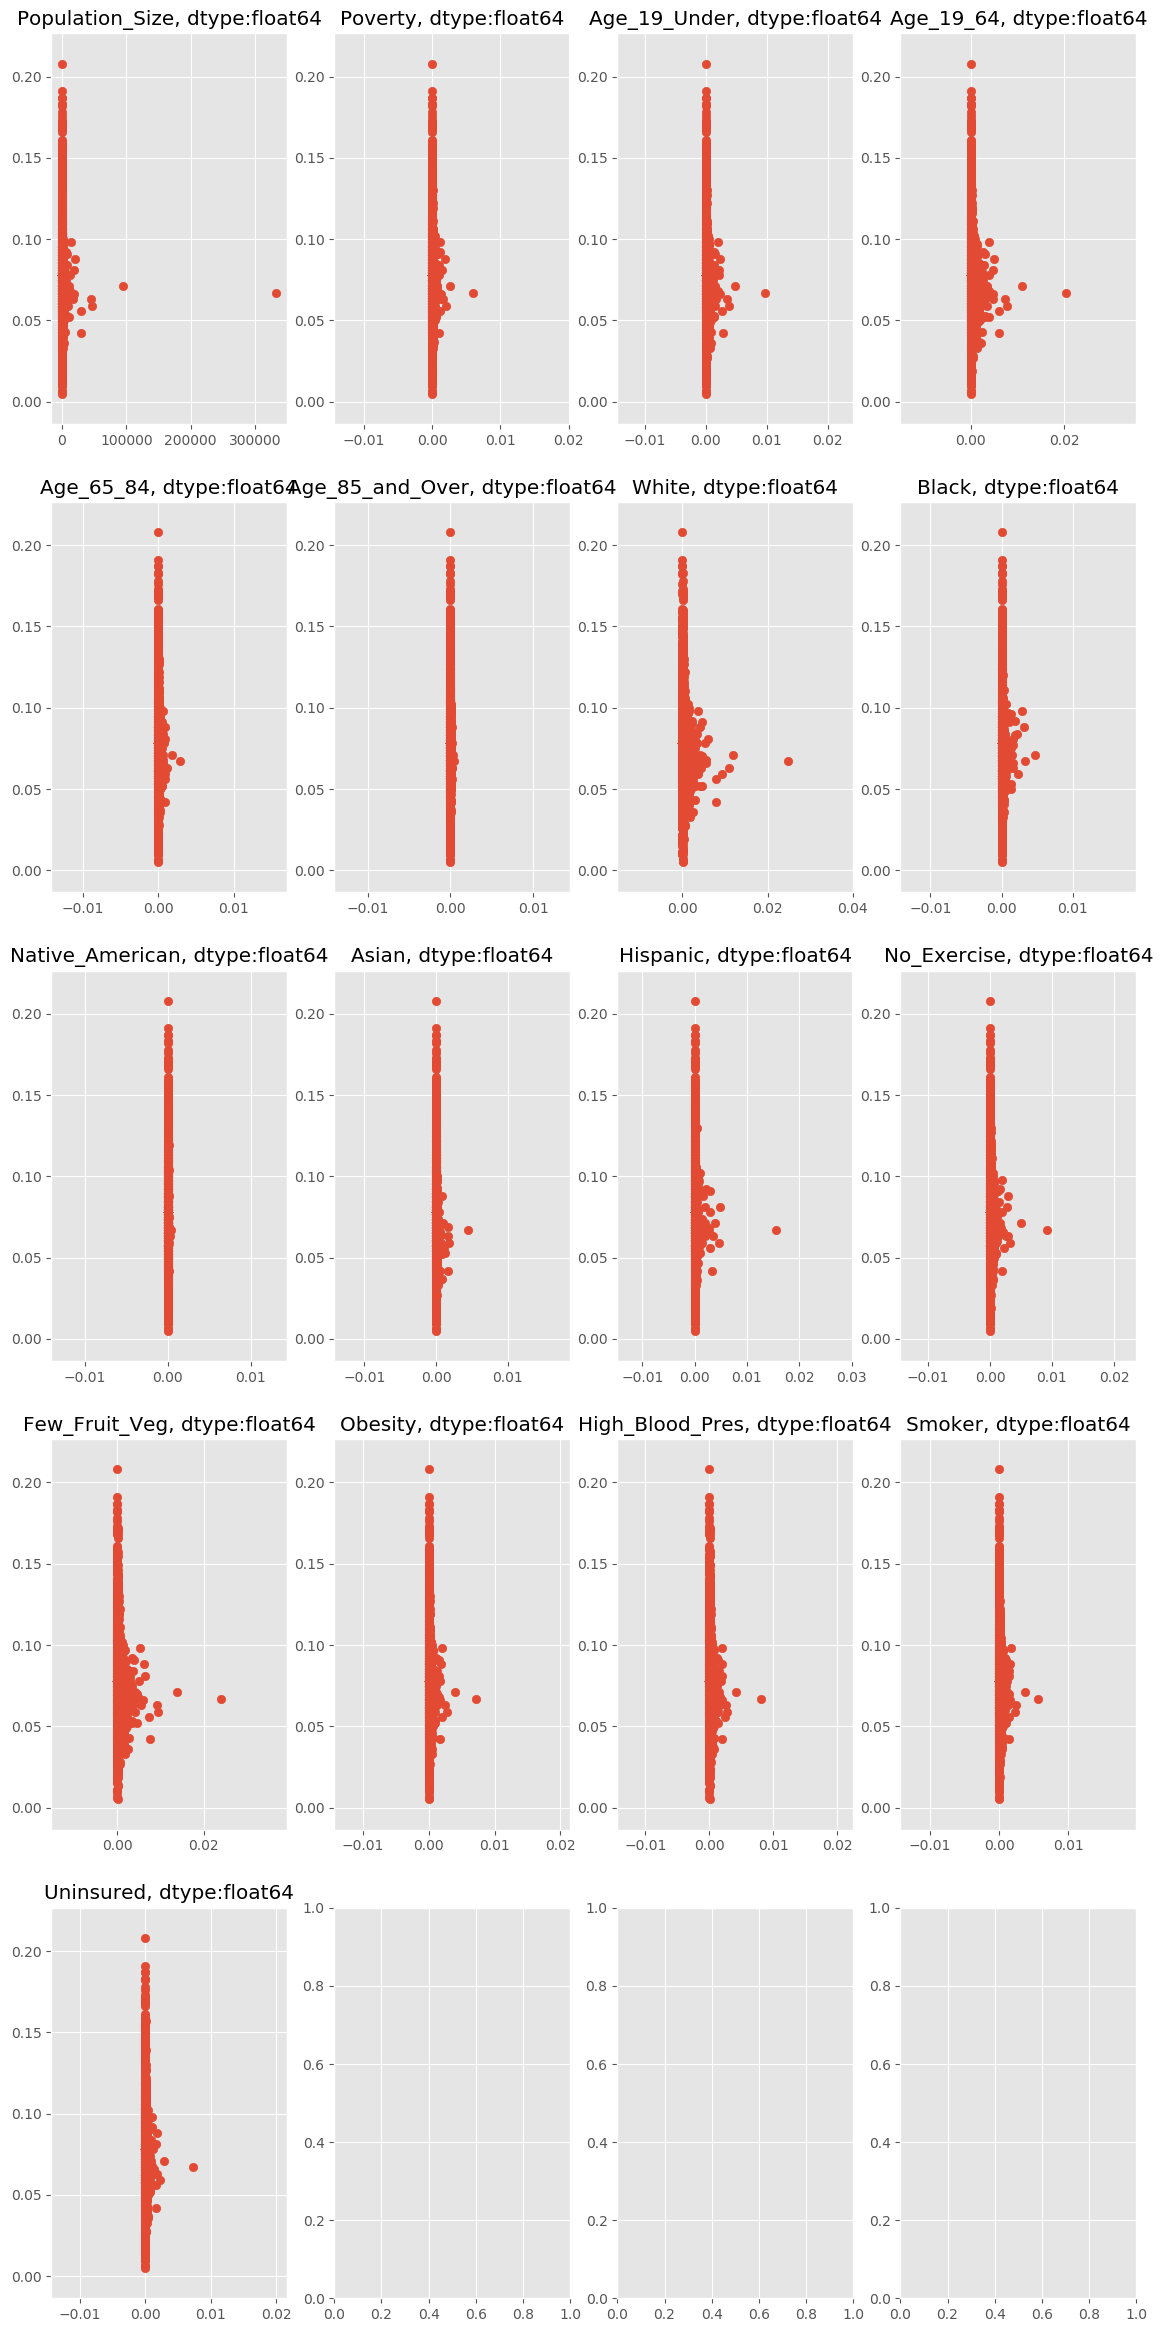

In [39]:
make_column_scatters(df, 'Diabetes', fig_columns=4, select_columns=col_list, figure_size=[14,30])

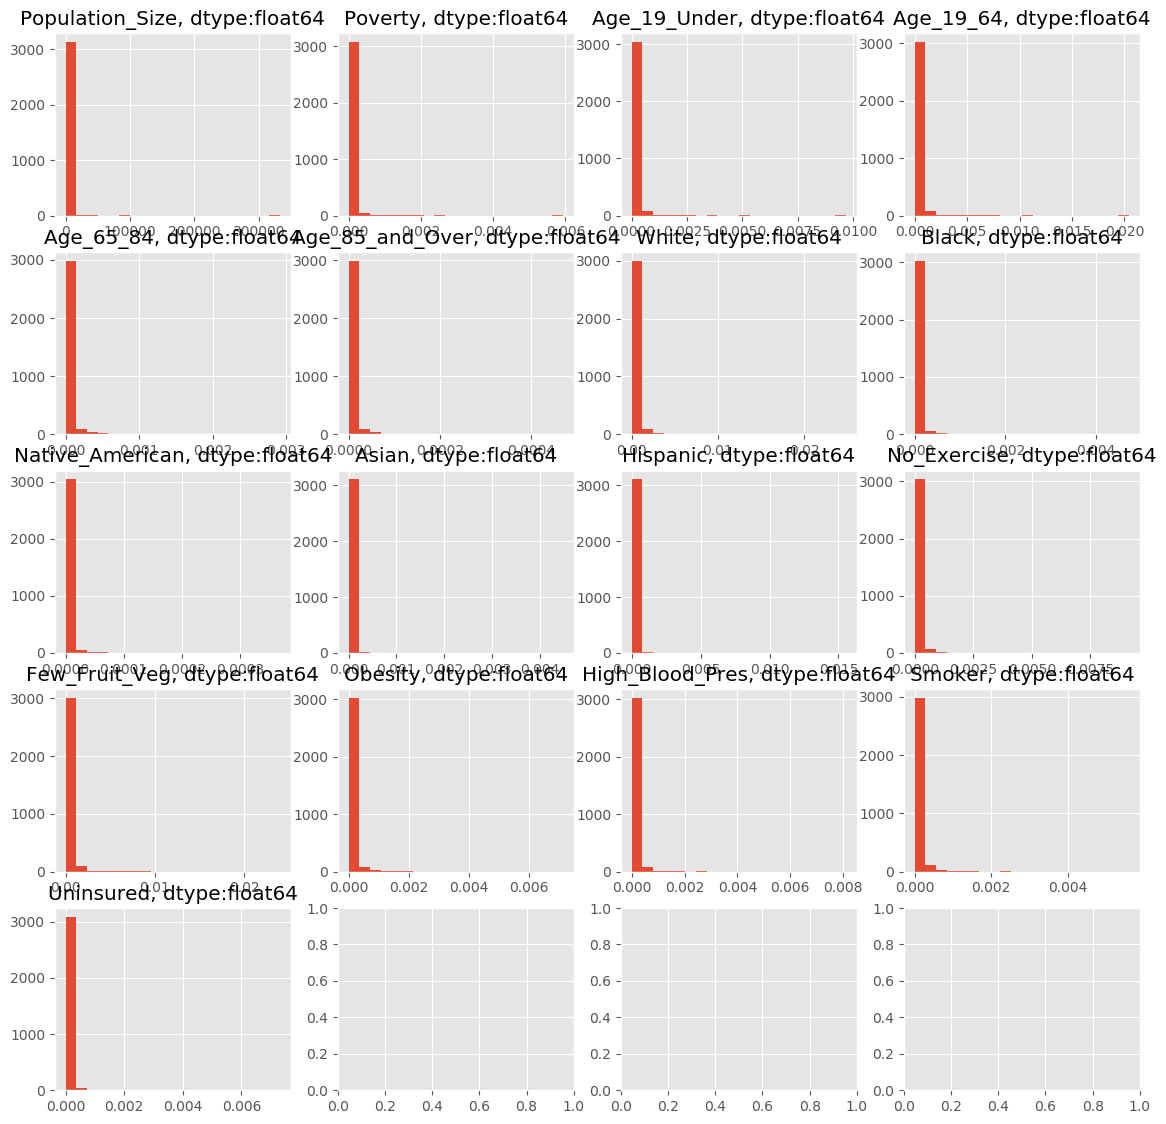

In [29]:
make_column_hists(df, 4, select_columns=col_list, bin_number=20)

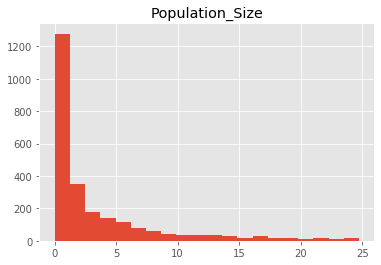

Population_Size values dropped: 1
Median is 1.179686467753001
Mean is 3.4046148426239418


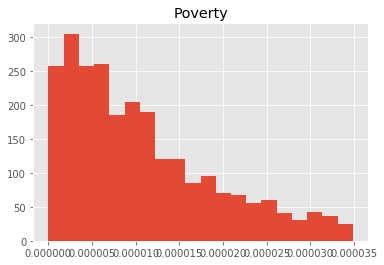

Poverty values dropped: 1
Median is 8.66899395339713e-06
Mean is 1.0712774818435913e-05


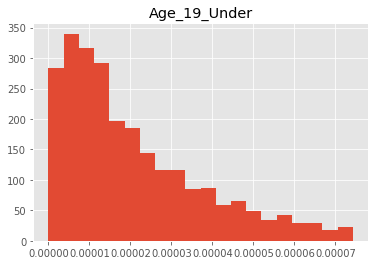

Age_19_Under values dropped: 1
Median is 1.5343152394880175e-05
Mean is 2.0639418526476432e-05


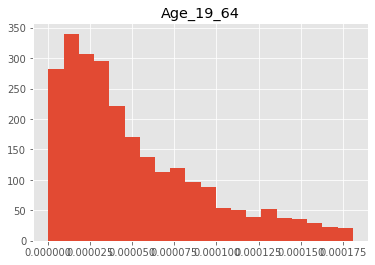

Age_19_64 values dropped: 1
Median is 3.768408041439732e-05
Mean is 5.05341774045375e-05


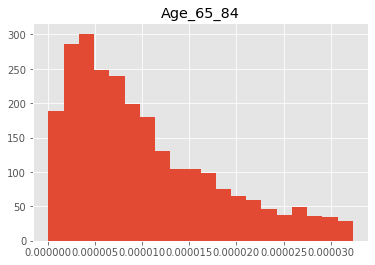

Age_65_84 values dropped: 1
Median is 8.03903293488983e-06
Mean is 1.0183873203524279e-05


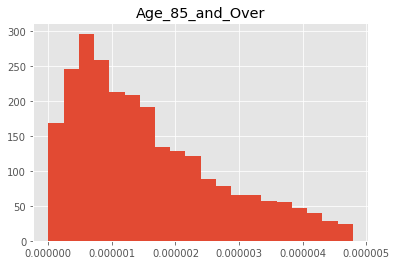

Age_85_and_Over values dropped: 1
Median is 1.2841587031472755e-06
Mean is 1.5607499777539685e-06


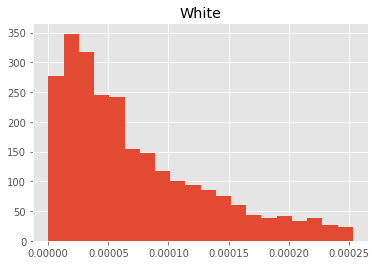

White values dropped: 1
Median is 5.3777700731449364e-05
Mean is 7.237181823137063e-05


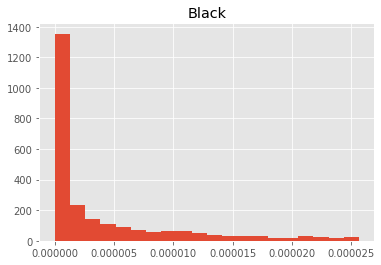

Black values dropped: 1
Median is 9.880557363971611e-07
Mean is 4.1489288626130554e-06


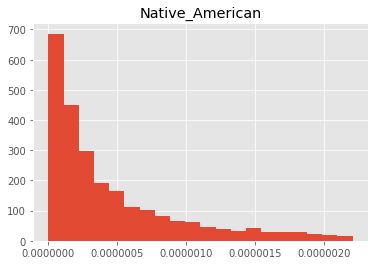

Native_American values dropped: 1
Median is 2.64398614024358e-07
Mean is 4.5698501681274986e-07


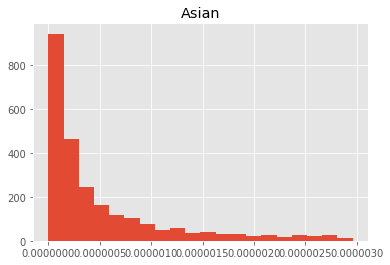

Asian values dropped: 1
Median is 2.3393240947102516e-07
Mean is 5.148738724159202e-07


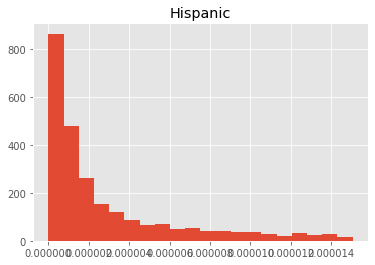

Hispanic values dropped: 1
Median is 1.2873704662539443e-06
Mean is 2.8487487487649886e-06


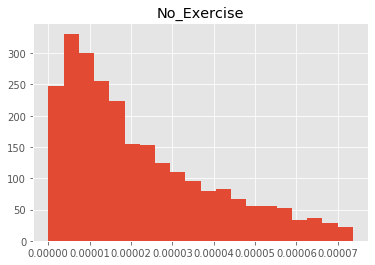

No_Exercise values dropped: 1
Median is 1.6764802898079115e-05
Mean is 2.212293197549903e-05


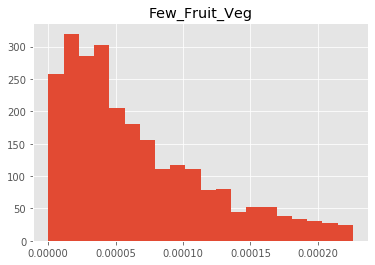

Few_Fruit_Veg values dropped: 1
Median is 5.0502822431293605e-05
Mean is 6.59993514189527e-05


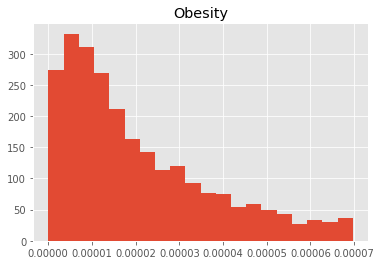

Obesity values dropped: 1
Median is 1.5098847726028101e-05
Mean is 2.0391834318494183e-05


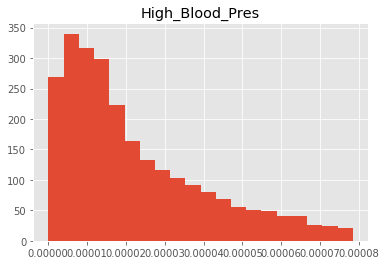

High_Blood_Pres values dropped: 1
Median is 1.6288247754085118e-05
Mean is 2.2193941314931017e-05


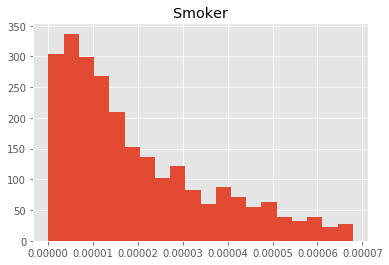

Smoker values dropped: 1
Median is 1.4318293130458079e-05
Mean is 1.9706846425238043e-05


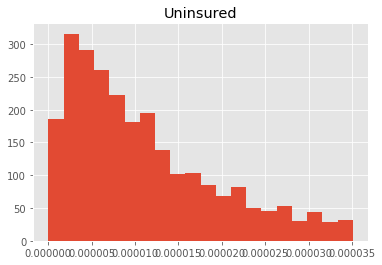

Uninsured values dropped: 1
Median is 8.619805396574406e-06
Mean is 1.0927475797791388e-05


In [35]:
# Dropped everythin above percentile .8 and plotted (did not affect df)
drop_n_plot(df, col_list)

In [41]:
df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Population_Size', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Pop_proportion'],
      dtype='object')

In [ ]:
fdf_cols = ['County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Population_Size', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Pop_proportion']

In [34]:
round(df.Poverty.describe(), 6)

count    3141.000000
mean        0.000040
std         0.000159
min         0.000000
25%         0.000005
50%         0.000011
75%         0.000027
max         0.005933
Name: Poverty, dtype: float64

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
formula = "mpg ~ acceleration+weight+orig_1+orig_2+orig_3"
model = ols(formula= formula, data=data_ols).fit()

In [42]:
df.Uninsured

0       0.000019
1       0.000067
2       0.000017
3       0.000011
4       0.000027
          ...   
3136    0.000018
3137    0.000006
3138    0.000010
3139    0.000004
3140    0.000003
Name: Uninsured, Length: 3141, dtype: float64